In [1]:
import pandas as pd
#from sklearn.clusters import KMeans
ald_pin=pd.read_csv('Allahabad_Modified.csv')
ald_pin

,Unnamed: 0,Location,Pincode,State,District,Latitude,Longitude
0,1,Agriculture Institute,211007,Uttar Pradesh,Allahabad,25.433468,81.842808
1,15,Allahpur,211006,Uttar Pradesh,Allahabad,25.448914,81.866805
2,25,Arail,211008,Uttar Pradesh,Allahabad,25.398056,81.862079
3,37,Babuganj,212404,Uttar Pradesh,Allahabad,25.528090,82.049268
4,41,Bagai Khurd,212404,Uttar Pradesh,Allahabad,25.528090,82.049268
5,45,Bahraicha,212106,Uttar Pradesh,Allahabad,25.176144,81.790145
6,62,Barha,212106,Uttar Pradesh,Allahabad,25.176144,81.790145
7,66,Basahra,212302,Uttar Pradesh,Allahabad,25.184562,82.092908
8,75,Belhat,212302,Uttar Pradesh,Allahabad,25.184562,82.092908
9,76,Belsara,212106,Uttar Pradesh,Allahabad,25.176144,81.790145


In [2]:
from sklearn.cluster import KMeans
import folium
k=3#Predfining no. of clusters
df=ald_pin.drop(['Location','State ','District ','Pincode '],axis=1)
clus=KMeans(n_clusters=k,random_state=0).fit(df)
print(clus.labels_+1)
ald_pin['Cluster labels']=clus.labels_+1

ald_map=folium.Map(location=[25.43,81.84],zoom_start=10)
rainbow=['blue','green','yellow','orange']
for lat,lon,loc,cluster in zip(ald_pin['Latitude'],ald_pin['Longitude'],ald_pin['Location'],ald_pin['Cluster labels']):
    labels=folium.Popup(loc+' '+str(cluster))
    points=folium.CircleMarker([lat,lon],radius=5,popup=labels,color=rainbow[cluster-1])
    points.add_to(ald_map)
    
ald_map


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [3]:
#Removing points on the outskirts
ald_pin=ald_pin[ald_pin['Cluster labels']!=3]


In [4]:
#Removing Manauri and Ghiyangr as they are far from the mainland
i1=ald_pin[ald_pin['Location']=='Manauri Af'].index
i2=ald_pin[ald_pin['Location']=='Ghiya Ngr'].index
ald_pin.drop(i1,inplace=True)
ald_pin.drop(i2,inplace=True) 


C:\Users\INTEL\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
#Using Foursquare API
CLIENT_ID = 'KI3TR0QO4JOKMFELOMF3WSOOI3HFNBF5YLW354MYWBKDHEX3' # Foursquare ID
CLIENT_SECRET = 'QF4ZBLJRBV4BQX52DVWUPEHJ14A2UJABPCZARZQZYTKIISUD' # Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KI3TR0QO4JOKMFELOMF3WSOOI3HFNBF5YLW354MYWBKDHEX3
CLIENT_SECRET:QF4ZBLJRBV4BQX52DVWUPEHJ14A2UJABPCZARZQZYTKIISUD


In [8]:
# FOURSQUARE API TRIAL
import requests
latitude=25.4
longitude=81.8
radius=1500
try:
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    results = requests.get(url).json()
    print('Done')
except:
    print('Connection timed out')
#df=pd.DataFrame(results)
#df.head()

Done


In [9]:
from pandas.io.json import json_normalize
#print(results)
venues = results['response']['venues']

# tranform venues into a dataframe
fs_ald = json_normalize(venues)
fs_ald.drop(['location.postalCode','location.crossStreet','location.state','location.city','location.formattedAddress','location.country','location.cc','location.distance','location.labeledLatLngs'],axis=1,inplace=True)
fs_ald.drop(['categories','referralId','hasPerk','id','location.address'],axis=1,inplace=True)
fs_ald.head()


C:\Users\INTEL\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,location.lat,location.lng
0,Karamat Ki Chauki,25.421836,81.815332
1,Rangoli Marriage Hall,25.421982,81.815436
2,kareli,25.421961,81.809746
3,Riddi Siddi Tea Shop Kareli,25.425784,81.816760
4,Common Room BH 4,25.427982,81.771650


We'll save the file obtained as csv so that we have it even if foursquare doesn't work afterwards for any reason whatsoever

In [28]:
#fs_ald.to_csv('Allahabad_venues.csv')

FOURSQUARE API IS WORKING WELL FOR ALLAHABAD. SO WE USE DIFFERENT LOCATIONS INSIDE ALLAHABAD TO GET SPECIFIC NEARBY VENUES

In [10]:
def nearby_location(la,lo):
    latitude=la
    longitude=lo
    radius=500
    try:
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
        results = requests.get(url).json()
        venues = results['response']['venues']
        # tranform venues into a dataframe
        fs_ald = json_normalize(venues)
        fs_ald.drop(['location.postalCode','location.crossStreet','location.state','location.city','location.formattedAddress','location.country','location.cc','location.distance','location.labeledLatLngs'],axis=1,inplace=True)
        fs_ald.drop(['categories','referralId','hasPerk','id','location.address'],axis=1,inplace=True)
        
        
        return fs_ald
    except:
        print('Connection timed out')

Selecting some posh areas of the city for 'the battle of neighbourhoods

In [11]:
posh_names={'Alopibagh':[25.4449991,81.870241],'Bairahna':[25.439239,81.859149],'Chowk':[25.4354049,81.833783],'Civil Lines':[25.456327,81.836098],'Daragunj':[25.449321,81.884019],'Georgetown':[25.45365,81.8722],'Katra':[25.464554,81.8521199]}
alopibagh_vn=nearby_location(posh_names['Alopibagh'][0],posh_names['Alopibagh'][1])
bairahna_vn=nearby_location(posh_names['Bairahna'][0],posh_names['Bairahna'][1])
chowk_vn=nearby_location(posh_names['Chowk'][0],posh_names['Chowk'][1])
civillines_vn=nearby_location(posh_names['Civil Lines'][0],posh_names['Civil Lines'][1])
daragunj_vn=nearby_location(posh_names['Daragunj'][0],posh_names['Daragunj'][1])
geogetown_vn=nearby_location(posh_names['Georgetown'][0],posh_names['Georgetown'][1])
katra_vn=nearby_location(posh_names['Katra'][0],posh_names['Katra'][1])
print('Done')

C:\Users\INTEL\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


Done


In [14]:
#Saving all of them to csv incase we need them
alopibagh_vn.to_csv('Alopibagh.csv')
bairahna_vn.to_csv('Bairahna.csv')
chowk_vn.to_csv('Chowk.csv')
civillines_vn.to_csv('Civil Lines.csv')
daragunj_vn.to_csv('Daragunj.csv')
geogetown_vn.to_csv('Georgetown.csv')
katra_vn.to_csv('Katra.csv')
print('Done')

Done


In [20]:
li=[alopibagh_vn,bairahna_vn,chowk_vn,civillines_vn,daragunj_vn,geogetown_vn,katra_vn]
neigh=pd.concat(li)
#neigh.to_csv('Combined Venues.csv')
neigh

,name,location.lat,location.lng
0,Prayag Raj,25.424908,81.896005
1,Allahabad High Court,25.455834,81.859863
2,Alopi Devi,25.443901,81.870760
3,Triveni Sangam,25.430015,81.879822
4,Bade hanuman ji mandir,25.433469,81.879198
...,...,...,...
25,Anand Bhawan,25.459247,81.860018
26,vinayak le grande,25.453673,81.839948
27,Allengunj & Church Lane Park,25.460686,81.865097
28,Allahabad Public Library,25.455280,81.849340


Now we cluster the venues to find the neighbourhood with maximum density

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import folium

In [8]:
k1=7#Predefining the number of clusters
loc_c=neigh.drop(['name'],axis=1)
clus_vn=KMeans(n_clusters=k1,random_state=0).fit(loc_c)
print(clus_vn.labels_+1)

[4 3 7 4 4 7 1 1 5 4 1 1 5 1 1 1 7 5 7 7 4 1 4 3 7 3 3 7 3 3 5 4 3 7 1 4 5
 1 5 5 5 4 3 1 3 1 1 3 5 3 3 3 3 1 1 3 5 7 3 3 5 5 5 5 5 5 5 5 2 5 2 5 5 2
 5 2 2 5 2 2 2 2 5 5 2 2 2 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 4 4 3 1 4 3 1 1 1 1 3 3 1 1 3 3 3 1 1 3 3 3 7 3 6 3 3
 3 3 6 1 1 1 1 3 1 1 4 1 3 4 3 1 1 1 1 3 3 1 3 3 3 3 1 3 3 6 6 6 6 6 3 3 6
 6 2 1 2 3 6 3 3 6 2 1 1 1 6 3 3 3 3 3 3 3 2 1 3 3]


In [24]:
neigh['Cluster labels']=clus_vn.labels_+1
#Generating map using folium
ald_map=folium.Map(location=[25.46,81.85],zoom_start=13)
color_list=['violet','indigo','blue','green','yellow','orange','red']
for name,lat,lon,clusters in zip(neigh['name'],neigh['location.lat'],neigh['location.lng'],neigh['Cluster labels']):
    labels=folium.Popup(name+ 'Cluster= '+str(clusters))
    points_on_map=folium.CircleMarker([lat,lon],radius=5,popup=labels,color=color_list[clusters-1])
    points_on_map.add_to(ald_map)
ald_map
#neigh.to_csv('Combined clustering.csv')
#print("Done")

From the map, we can easily see that the most densely populated area is the purple one that belongs to cluster 2,i.e CIVIL LINES

Using matplotlib to find the largest cluster

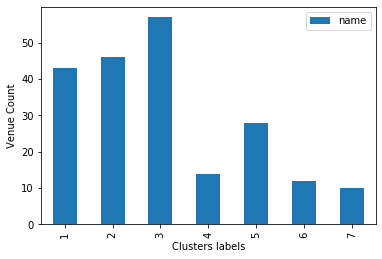

In [72]:
import matplotlib as mlt
import matplotlib.pyplot as plt
neigh=pd.read_csv('Combined clustering.csv')
neigh.drop(['location.lat','location.lng'],axis=1,inplace=True)
neigh
clus_count=neigh.groupby(by=['Clusters labels']).count()
#clus_count.drop(['name'],axis=0,inplace=True)
clus_count.plot(kind='bar')
plt.ylabel('Venue Count')
plt.show()

This brings us to the end of the notebook. Thanks for your attention.

##### *If the maps weren't visible, check out the readme file for the same .